<a href="https://colab.research.google.com/github/Ulisman/Model-comprehension/blob/main/False_accuracyipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow import keras

## Testing how a image classifier built for digit recognition reacts to completely different images

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

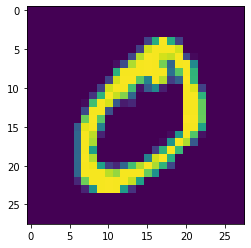

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(X_train[1])

In [ ]:
y_train[1]

0

In [ ]:
import numpy as np
len(np.unique(y_train))

10

### Creating the model

In [ ]:
X_train.shape #(60000, 28, 28)
inp_shape = (28, 28, 1) #1 represents the 1 dimensional colorway

In [ ]:
input = keras.layers.Input(shape=inp_shape)
x = keras.layers.Conv2D(64, 3, activation='relu')(input)
x = keras.layers.Flatten()(x) #Important to flatten before we pass to FNN
x = keras.layers.Dense(64, activation='relu')(x)
x = keras.layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=input, outputs=x)

In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer='adam',
    metrics = ['accuracy']
)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 flatten (Flatten)           (None, 43264)             0         
                                                                 
 dense (Dense)               (None, 64)                2768960   
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 2,770,250
Trainable params: 2,770,250
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.6322 - accuracy: 0.9152
Epoch 2/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0824 - accuracy: 0.9753
Epoch 3/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0529 - accuracy: 0.9836
Epoch 4/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0353 - accuracy: 0.9892
Epoch 5/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0282 - accuracy: 0.9914
Epoch 6/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0222 - accuracy: 0.9931
Epoch 7/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0203 - accuracy: 0.9941
Epoch 8/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0176 - accuracy: 0.9955
Epoch 9/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0180 - accuracy: 0.9955
Epoch 10/10
1875/1875 [==============================] - 77s 41m

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.1919 - accuracy: 0.9749


[0.19191649556159973, 0.9749000072479248]

In [ ]:
predictions_5 = model.predict(X_test[:5])

In [ ]:
print(predictions_5[0])
print("predicted label: ", np.argmax(predictions_5[0]))
print("true label: ", y_test[0])
print("Confidence: ", predictions_5[0][y_test[0]]) #100%

[5.7399257e-26 9.3508669e-24 4.9614298e-19 6.9383333e-22 1.0459655e-16
 4.6013917e-24 7.1042043e-28 1.0000000e+00 1.1879501e-16 2.6795118e-21]
predicted label:  7
true label:  7
Confidence:  1.0


In [ ]:
for x in range(len(predictions_5)):
  print("Conf:" , predictions_5[x][y_test[x]])

Conf: 1.0
Conf: 1.0
Conf: 1.0
Conf: 1.0
Conf: 1.0


### Testing how the model reacts to completly irrelevant images

In [ ]:
import cv2
img_path = '/content/car.jpg'
img = cv2.imread(img_path)
img.shape

(1082, 1915, 3)

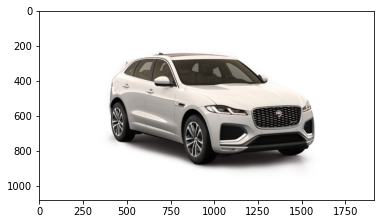

In [ ]:
plt.imshow(img)

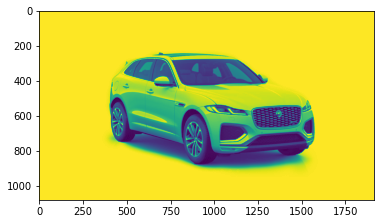

(1082, 1915)

In [ ]:
img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_grayscale)
plt.show()
img_grayscale.shape

In [ ]:
X_train[0].shape

(28, 28)

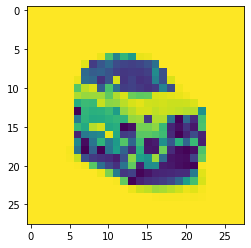

(28, 28)

In [ ]:
img_reshaped = cv2.resize(img_grayscale, (28, 28))
plt.imshow(img_reshaped)
plt.show()
img_reshaped.shape

In [ ]:
model.predict(np.array([X_test[0]]))

array([[5.7398814e-26, 9.3507596e-24, 4.9614107e-19, 6.9382803e-22,
        1.0459576e-16, 4.6013389e-24, 7.1040955e-28, 1.0000000e+00,
        1.1879456e-16, 2.6794912e-21]], dtype=float32)

In [ ]:
car_prediction = model.predict(np.array([img_reshaped]))

In [ ]:
print("Probability distribution: " ,car_prediction)
print("Prediction: ", np.argmax(car_prediction))
print("Confidence: ", car_prediction[0][np.argmax(car_prediction)])

Probability distribution:  [[0.03178909 0.65152884 0.01372    0.03322923 0.01284536 0.01048334
  0.00255929 0.03860955 0.2015729  0.00366246]]
Prediction:  1
Confidence:  0.65152884


In [ ]:
#65% is pretty high for a probability for a image of a car

### Sword image

(32, 32, 3)


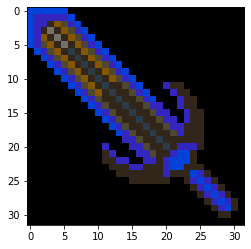

In [ ]:
import cv2
sword_path = '/content/sword.png'
sword_img = cv2.imread(sword_path)

print(sword_img.shape)
plt.imshow(sword_img)
plt.show()

(32, 32)


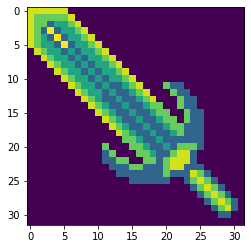

In [ ]:
sword_img_grayscale = cv2.cvtColor(sword_img, cv2.COLOR_BGR2GRAY)
plt.imshow(sword_img_grayscale)
print(sword_img_grayscale.shape)
plt.show()

(28, 28)


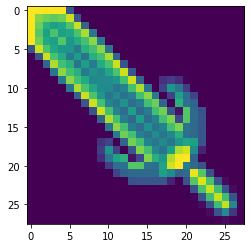

In [ ]:
#Reshaping 
sword_img_reshaped = cv2.resize(sword_img_grayscale, (28, 28))
print(sword_img_reshaped.shape)
plt.imshow(sword_img_reshaped)
plt.show()

In [ ]:
sword_prediction = model.predict(np.array([sword_img_reshaped]))

In [ ]:
print(sword_prediction)
print("Predicted label: ", np.argmax(sword_prediction))
print("Confidence probability: ", sword_prediction[0][np.argmax(sword_prediction)])

[[4.7180520e-06 9.5923133e-03 3.2227895e-01 5.9921923e-04 6.1449237e-02
  5.7387543e-03 1.1054899e-03 5.4808426e-01 2.7631475e-03 4.8383903e-02]]
Predicted label:  7
Confidence probability:  0.54808426


In [ ]:
#Model saying it is a 54.8% probability that the images is the digit 7. This shows a lack of understanding from the model